## Final: Rep1 10262022

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st 
import matplotlib.pyplot as plt
import seaborn as sns
import os
import readfcs
# from skimage.filters import threshold_mean
from scipy import stats
from scipy.stats import hypergeom
import statsmodels
from statsmodels.sandbox.stats.multicomp import multipletests
# from sklearn import preprocessing

import warnings

warnings.filterwarnings('ignore')

%matplotlib inline

❗ You are running 3.11.6
Only python versions 3.7~3.10 are currently tested, use at your own risk.


In [2]:
cd /Users/piyushnanda/Documents/PhD_MurrayLab/EMC/Data/eEMC012/eEMC012_Fraction/

/Users/piyushnanda/Documents/PhD_MurrayLab/EMC/Data/eEMC012/eEMC012_Fraction


In [3]:
files_cts1=np.array(sorted(os.listdir('.'))[0:12]).reshape(3,4)
files_bud2=np.array(sorted(os.listdir('.'))[12:24]).reshape(3,4)

In [4]:
def fcs_reader(f):
    data=readfcs.ReadFCS(f).data
    fsc_vals=np.array(data['FSC-A'])[0:3000]
    yellow_vals=np.array(data['FITC-A'])[0:3000]
    red_vals=np.array(data['PE Texas Red-A'])[0:3000]
    return fsc_vals,yellow_vals,red_vals

In [5]:
#number of replicates
rep=0

In [6]:
r_reps=[]
y_reps=[]
m_reps=[]


for rep in [0,1,2]:
    r_c=[]
    y_c=[]
    m_c=[]
    for j in range(4):
        fsc_raw=np.array(fcs_reader(files_cts1[rep][j])[0])
        yellow_raw=np.array(fcs_reader(files_cts1[rep][j])[1])
        red_raw=np.array(fcs_reader(files_cts1[rep][j])[2])
        red=red_raw[(fsc_raw>0)]/fsc_raw[(fsc_raw>0)]
        yellow=yellow_raw[(fsc_raw>0)]/fsc_raw[(fsc_raw>0)]
        fsc=fsc_raw[(fsc_raw>0)]
        cols=['red' if r>0.01 and y<0.05 else 'blue' for r,y in zip(red,yellow)]
    
    #     plt.figure(figsize=(4,4))
    #     plt.scatter(red,yellow,s=0.5)
    #     plt.plot([0,0.5],[0.04,0.04],linestyle='--',color='yellow',linewidth=2)
    #     plt.plot([0.015,0.015],[0,1.5],linestyle='--',color='red',linewidth=2)
    #     plt.xlim(-0.01,0.5)
    #     plt.ylim(0,1.2)
    #     plt.tight_layout()
    
        r_f=sum(yellow<=0.04)/len(red)
        y_f=sum(red<=0.015)/len(red)
        m_f=1-y_f-r_f
    #     print('Germline:',r_f)
    #     print('Somatic:',y_f)
    #     print('Mix:',m_f)
        
        r_c.append(r_f)
        y_c.append(y_f)
        m_c.append(m_f)
    
    r_b=[]
    y_b=[]
    m_b=[]
    for j in range(4):
        fsc_raw=np.array(fcs_reader(files_bud2[rep][j])[0])
        yellow_raw=np.array(fcs_reader(files_bud2[rep][j])[1])
        red_raw=np.array(fcs_reader(files_bud2[rep][j])[2])
        red=red_raw[(fsc_raw>0)]/fsc_raw[(fsc_raw>0)]
        yellow=yellow_raw[(fsc_raw>0)]/fsc_raw[(fsc_raw>0)]
        fsc=fsc_raw[(fsc_raw>0)]
        cols=['red' if r>0.01 and y<0.05 else 'blue' for r,y in zip(red,yellow)]
    
    #     plt.figure(figsize=(4,4))
    #     plt.scatter(red,yellow,s=0.5)
    #     plt.plot([0,0.5],[0.04,0.04],linestyle='--',color='yellow',linewidth=2)
    #     plt.plot([0.015,0.015],[0,1.5],linestyle='--',color='red',linewidth=2)
    #     plt.xlim(-0.01,0.5)
    #     plt.ylim(0,1.2)
    #     plt.tight_layout()
    
        r_f=sum(yellow<=0.04)/len(red)
        y_f=sum(red<=0.015)/len(red)
        m_f=1-y_f-r_f
    #     print('Germline:',r_f)
    #     print('Somatic:',y_f)
    #     print('Mix:',m_f)
        r_b.append(r_f)
        y_b.append(y_f)
        m_b.append(m_f)
    
    r_c.extend(r_b)
    y_c.extend(y_b)
    m_c.extend(m_b)

    r_reps.append(r_c)
    y_reps.append(y_c)
    m_reps.append(m_c)

In [7]:
#Mean
r_mean=np.mean(r_reps,axis=0)
y_mean=np.mean(y_reps,axis=0)
m_mean=np.mean(m_reps,axis=0)

#Standard deviation
r_std=np.std(r_reps,axis=0)/np.sqrt(3)
y_std=np.std(y_reps,axis=0)/np.sqrt(3)
m_std=np.std(m_reps,axis=0)/np.sqrt(3)

## All replicates

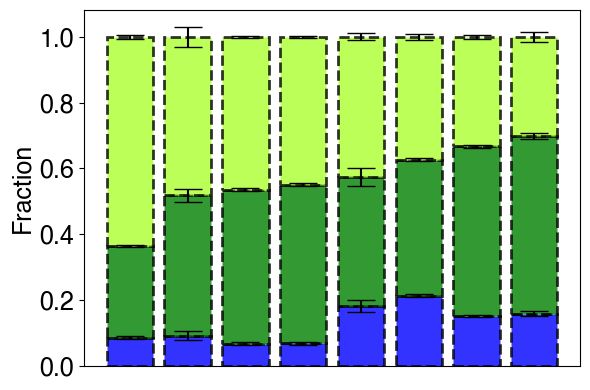

In [8]:
a=0.8
plt.rc('font',family='helvetica')
plt.figure(figsize=(6,4))
plt.bar([0,1,2,3,4,5,6,7], r_mean,yerr=r_std, capsize=10,color='blue',edgecolor='black',linewidth=2,linestyle='--',alpha=a)
plt.bar([0,1,2,3,4,5,6,7], m_mean, bottom=r_mean,yerr=y_std,capsize=10, color='green',edgecolor='black',linewidth=2,linestyle='--',alpha=a)
plt.bar([0,1,2,3,4,5,6,7], y_mean, bottom=np.array(m_mean)+np.array(r_mean),yerr=m_std,capsize=10, color='greenyellow',edgecolor='black',linewidth=2,linestyle='--',alpha=a)
# plt.xlabel(r'Kissing Number',fontsize=18)
plt.ylabel(r'Fraction',fontsize=18)
plt.xticks([],fontsize=18)
plt.yticks(fontsize=18)
# plt.ylim(0,1.1)
plt.tight_layout()
plt.savefig('/Users/piyushnanda/Documents/PhD_MurrayLab/EMC/Figures/Final/all_fraction_errorbars.jpg')

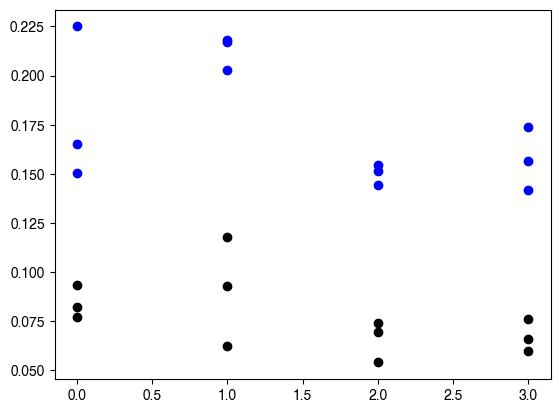

In [45]:
plt.scatter([0,1,2,3],r_reps[0][0:4],color='black')
plt.scatter([0,1,2,3],r_reps[1][0:4],color='black')
plt.scatter([0,1,2,3],r_reps[2][0:4],color='black')

plt.scatter([0,1,2,3],r_reps[0][4:8],color='blue')
plt.scatter([0,1,2,3],r_reps[1][4:8],color='blue')
plt.scatter([0,1,2,3],r_reps[2][4:8],color='blue')

In [37]:
stats.ttest_ind([m_reps[0][6],m_reps[1][6],m_reps[2][6]],[m_reps[0][2],m_reps[1][2],m_reps[2][2]],alternative='greater')

TtestResult(statistic=4.66216550242605, pvalue=0.004787039464213533, df=4.0)

In [38]:
[m_reps[0][6],m_reps[1][6],m_reps[2][6]]

[0.5243333333333333, 0.526, 0.49866666666666665]

In [39]:
[m_reps[0][2],m_reps[1][2],m_reps[2][2]]

[0.4740000000000001, 0.45966666666666667, 0.47433333333333333]